

Assignment Expectations/Steps -

1. Import and store the data in a data frame. (2.5 points)
2. Remove the outliers from the data (5 points)
3. Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable. (2.5 points)
4. Drop the independent variables which has less than 0.1 correlation with the dependent variable (5 points)
5. Create scatter Plot of Independent Variable vs Dependent Variable. (2.5 points)
6. Divide the data set into training and test data set and build a Multiple Linear Regression model. (5 points)
7. Print the coefficients & intercepts of the linear regression model (5 points)
8. Print the accuracy of the overall model (2.5 points)

In [2]:
import numpy as np
import pandas as pd

## 1. Import and store the data in a data frame.

In [3]:
cols = np.array(['City1','City2','Average Fare','Distance','Average weekly passengers','market leading airline','market share','Average fare1','Low price airline','market share1','price'])

In [4]:
df=pd.read_fwf("http://www.stat.ufl.edu/~winner/data/airq402.dat",header=None)
df

,0,1,2,3,4,5,6,7,8,9,10
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
5,ALB,FLL,135.17,1204,199.02,WN,40.68,137.97,DL,17.09,127.69
6,ALB,LAS,152.85,2237,237.17,WN,59.94,148.59,WN,59.94,148.59
7,ALB,LAX,190.73,2467,191.95,DL,17.89,205.06,US,16.59,174.00
8,ALB,MCO,129.35,1073,550.54,WN,76.84,127.69,WN,76.84,127.69
9,ALB,TPA,134.17,1130,202.93,US,35.40,132.91,DL,26.40,124.78


In [5]:
df.columns= np.array(cols)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
City1                        1000 non-null object
City2                        1000 non-null object
Average Fare                 1000 non-null float64
Distance                     1000 non-null int64
Average weekly passengers    1000 non-null float64
market leading airline       1000 non-null object
market share                 1000 non-null float64
Average fare1                1000 non-null float64
Low price airline            1000 non-null object
market share1                1000 non-null float64
price                        1000 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.0+ KB


In [7]:
df.shape

(1000, 11)

In [8]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
City1,1000,90,ATL,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City2,1000,85,TPA,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average Fare,1000,NaN,NaN,NaN,163.375,55.3655,50.52,125.975,161.345,197.392,401.23
Distance,1000,NaN,NaN,NaN,1056.97,643.203,108,553.5,919,1452.5,2724
Average weekly passengers,1000,NaN,NaN,NaN,672.279,766.519,181.41,257.197,404.78,769.912,8950.76
market leading airline,1000,16,WN,257,NaN,NaN,NaN,NaN,NaN,NaN,NaN
market share,1000,NaN,NaN,NaN,60.1286,19.3678,17.68,46.51,59.24,73.51,100
Average fare1,1000,NaN,NaN,NaN,166.648,62.6601,50.52,124.085,161.4,202.977,490.03
Low price airline,1000,19,WN,230,NaN,NaN,NaN,NaN,NaN,NaN,NaN
market share1,1000,NaN,NaN,NaN,34.5515,27.097,1.06,13.195,26.14,52.9725,100


### Removing the outliers from the data

In [9]:
Q1= df.quantile(0.25)
Q3= df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Average Fare                  71.4175
Distance                     899.0000
Average weekly passengers    512.7150
market share                  27.0000
Average fare1                 78.8925
market share1                 39.7775
price                         54.7625
dtype: float64


In [10]:
# True indicates that the values were out of range as per definition. 
print((df<(Q1- 1.5 * IQR)) | (df>(Q3+ 1.5 * IQR))) 
#print(df>(Q3+ 1.5 * IQR))

     Average Fare  Average fare1  Average weekly passengers  City1  City2  \
0           False          False                      False  False  False   
1           False          False                      False  False  False   
2           False          False                      False  False  False   
3           False          False                      False  False  False   
4           False          False                      False  False  False   
5           False          False                      False  False  False   
6           False          False                      False  False  False   
7           False          False                      False  False  False   
8           False          False                      False  False  False   
9           False          False                      False  False  False   
10          False          False                      False  False  False   
11          False          False                      False  False  False   

In [11]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.head(10)

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare1,Low price airline,market share1,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
5,ALB,FLL,135.17,1204,199.02,WN,40.68,137.97,DL,17.09,127.69
6,ALB,LAS,152.85,2237,237.17,WN,59.94,148.59,WN,59.94,148.59
7,ALB,LAX,190.73,2467,191.95,DL,17.89,205.06,US,16.59,174.00
8,ALB,MCO,129.35,1073,550.54,WN,76.84,127.69,WN,76.84,127.69
9,ALB,TPA,134.17,1130,202.93,US,35.40,132.91,DL,26.40,124.78


In [12]:
df_out.shape

(885, 11)

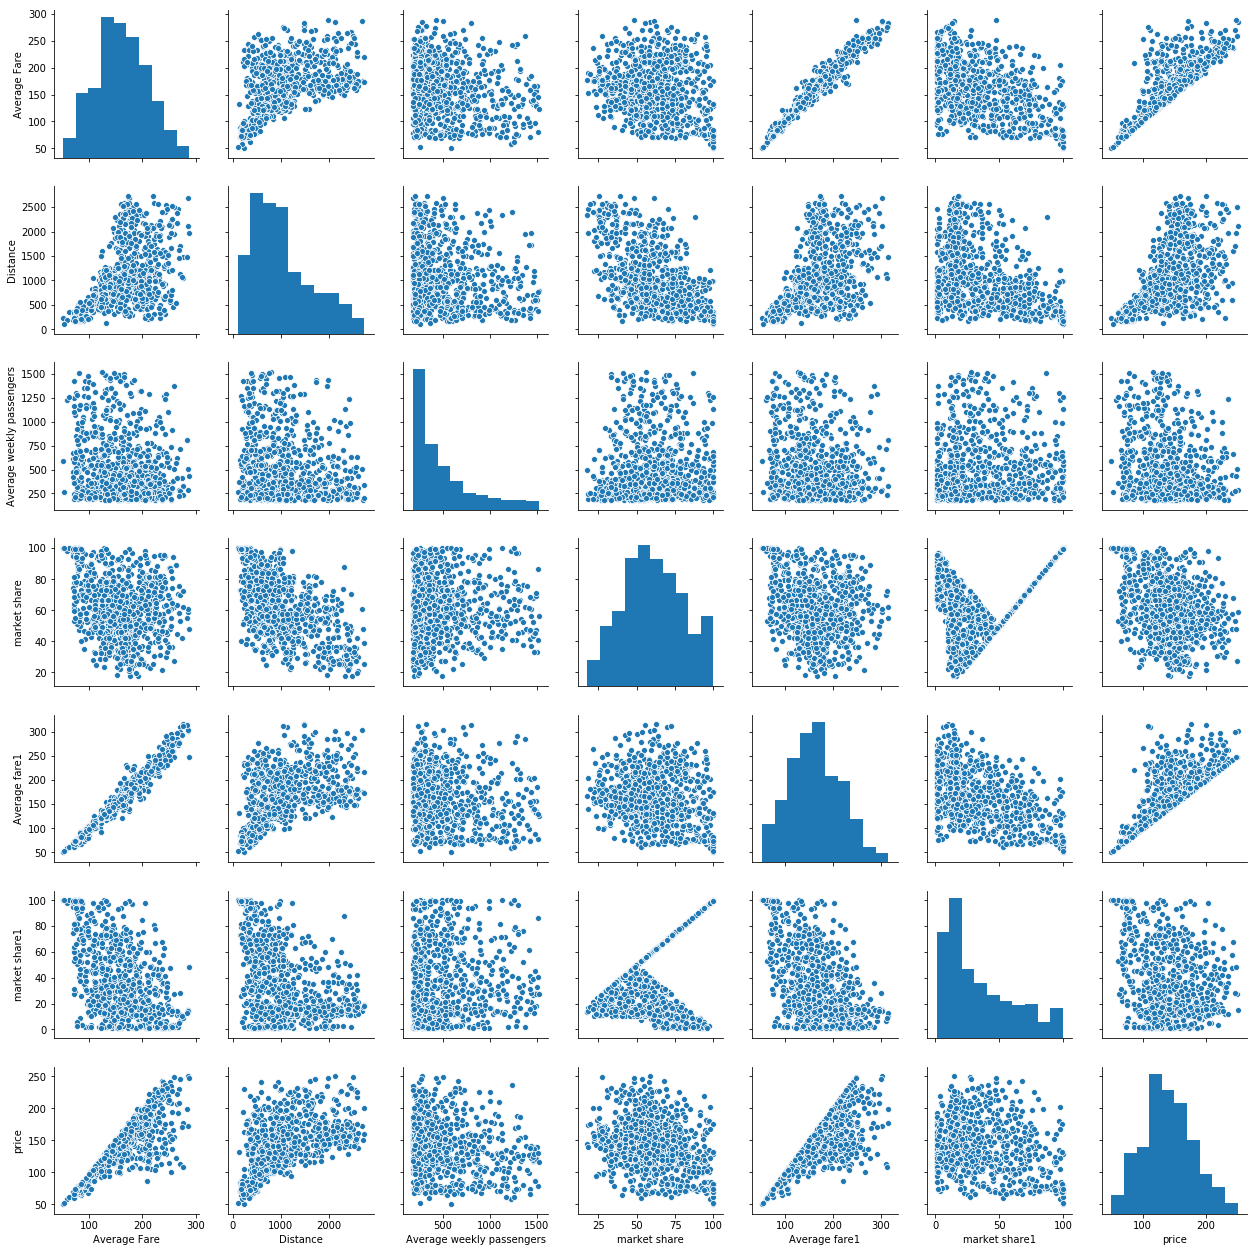

In [16]:
import seaborn as sns
sns.pairplot(df_out)

### Considering “Average Fare” – 3rdColumn as Dependent Variable and Rest of the columns as Independent Variable.

In [17]:
Y = pd.DataFrame(df_out[['Average Fare']])
X = pd.DataFrame(df_out[['City1','City2','Average Fare','Distance','Average weekly passengers','market leading airline','market share','Average fare1','Low price airline','market share1','price']])
print(X)
print(Y)                 

    City1 City2  Average Fare  Distance  Average weekly passengers  \
0     CAK   ATL        114.47       528                     424.56   
1     CAK   MCO        122.47       860                     276.84   
2     ALB   ATL        214.42       852                     215.76   
3     ALB   BWI         69.40       288                     606.84   
4     ALB   ORD        158.13       723                     313.04   
5     ALB   FLL        135.17      1204                     199.02   
6     ALB   LAS        152.85      2237                     237.17   
7     ALB   LAX        190.73      2467                     191.95   
8     ALB   MCO        129.35      1073                     550.54   
9     ALB   TPA        134.17      1130                     202.93   
10    ABQ   ATL        212.49      1269                     198.80   
11    ABQ   BWI        173.56      1670                     312.39   
12    ABQ   ORD        170.67      1121                     364.78   
13    ABQ   DFW     

In [18]:
df_out.corr()

,Average Fare,Distance,Average weekly passengers,market share,Average fare1,market share1,price
Average Fare,1.000000,0.522650,-0.197005,-0.207955,0.979713,-0.493555,0.840993
Distance,0.522650,1.000000,-0.129632,-0.547952,0.489721,-0.361519,0.539894
Average weekly passengers,-0.197005,-0.129632,1.000000,0.021769,-0.163736,0.076176,-0.209018
market share,-0.207955,-0.547952,0.021769,1.000000,-0.193382,0.281182,-0.314555
Average fare1,0.979713,0.489721,-0.163736,-0.193382,1.000000,-0.519442,0.794157
market share1,-0.493555,-0.361519,0.076176,0.281182,-0.519442,1.000000,-0.260912
price,0.840993,0.539894,-0.209018,-0.314555,0.794157,-0.260912,1.000000


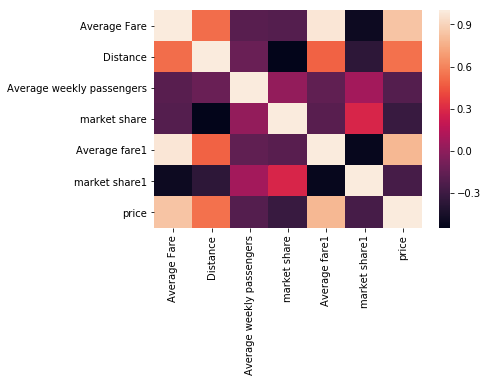

In [21]:
corr= df_out.corr()

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

### Dropping the independent variables which has less than 0.1 correlation with the dependent variable

In [22]:
# dropping all the columns with categorical values from independent dataframe. 
# When correlation of average prices compared to other columns is > 0.1 (in both positive and negative directions), 
# we need to consider all of them
# Hence the independent dataset is redefined as below.
X=X.drop(['City1','City2','market leading airline','Low price airline'],axis=1)


In [23]:
X=X.drop(['Average Fare','Average weekly passengers','market share','market share1'],axis=1)

In [24]:
X

,Distance,Average fare1,price
0,528,111.03,111.03
1,860,123.09,118.94
2,852,223.98,167.12
3,288,68.86,68.86
4,723,161.36,145.42
5,1204,137.97,127.69
6,2237,148.59,148.59
7,2467,205.06,174.00
8,1073,127.69,127.69
9,1130,132.91,124.78


### Creating scatter Plot of Independent Variable vs Dependent Variable.

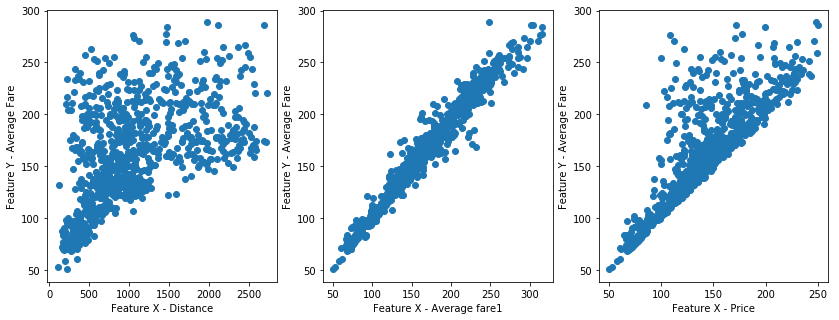

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

                 
plt.figure(figsize=(14,5))

plt.subplot(1,3,1)
plt.scatter(X['Distance'], Y)
plt.ylabel('Feature Y - Average Fare')
plt.xlabel('Feature X - Distance')
# Distance, Average fare1, price
plt.subplot(1,3,2)
plt.scatter(X['Average fare1'], Y)
plt.ylabel('Feature Y - Average Fare')
plt.xlabel('Feature X - Average fare1')

plt.subplot(1,3,3)
plt.scatter(X['price'], Y)
plt.ylabel('Feature Y - Average Fare')
plt.xlabel('Feature X - Price')


plt.show()

##### From the above plots, we can see the linear relation between the independent variables from feature X axis and dependant variable on Y- axis


### Dividing the data set into training and test data set and building a Multiple Linear Regression model.

In [35]:
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
X_train, X_test,y_train, y_test = train_test_split( X,Y, test_size=0.2, random_state=0)

In [36]:

regressor = LinearRegression()  
regressor.fit(X_train,y_train)
regressor.coef_

array([[0.00169411, 0.76662558, 0.19886295]])

### Printing the coefficients & intercepts of the linear regression model

In [37]:

Coeff_df = pd.DataFrame(regressor.coef_,columns=X.columns.array)
Coeff_df

,Distance,Average fare1,price
0,0.001694,0.766626,0.198863


#### The intercept indicates the value of Y for each of the test value combination. It can be determined by y_predict value calulated on X_test dataset

In [38]:
y_pred = pd.DataFrame(regressor.predict(X_test),index=X_test.index,columns=y_test.columns)

In [39]:
y_pred

,Average Fare
14,175.287831
170,79.480024
854,97.845093
821,221.172005
543,128.532167
302,169.979691
686,146.991339
786,235.872149
596,167.443384
612,122.663313


### Printing the accuracy of the overall model. I have calculated RMS and score of the regression model in the below steps

In [40]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
rmse

7.646691391686105

In [41]:

df_test_pred=y_test
#y_test.index
#y_pred.index
df_test_pred=df_test_pred.join(y_pred,on=y_pred.index,rsuffix=' predicted')

In [42]:
df_test_pred

,Average Fare,Average Fare predicted
14,168.69,175.287831
170,76.70,79.480024
854,93.40,97.845093
821,229.58,221.172005
543,126.07,128.532167
302,177.35,169.979691
686,146.45,146.991339
786,242.45,235.872149
596,160.37,167.443384
612,120.65,122.663313


In [43]:
regressor.score(X_test,y_test)

0.974900447598158

### Plot b/w the test and predicted values to compare the actual value from Y_test and Y_predict values


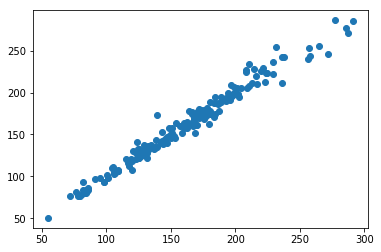

In [44]:
plt.scatter(y_pred,y_test)

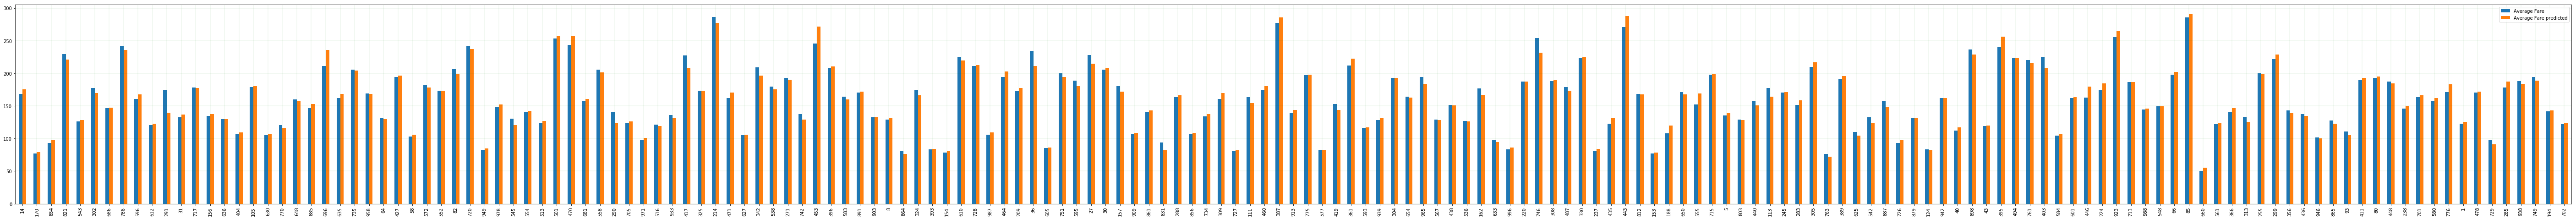

In [45]:
df_test_pred.plot(kind='bar',figsize=(100,8))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.1', color='black')
plt.show()